<a href="https://colab.research.google.com/github/Devv07/AI_Practice/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import requests
import pandas as pd

url="https://jsonplaceholder.typicode.com/users";

response=requests.get(url)
print(response.status_code)

data=response.json()
df=pd.DataFrame(data)
df.to_csv("user_data.csv",index=False)

df.head()

200


,id,name,username,email,address,phone,website,company
0,1,Leanne Graham,Bret,Sincere@april.biz,"{'street': 'Kulas Light', 'suite': 'Apt. 556',...",1-770-736-8031 x56442,hildegard.org,"{'name': 'Romaguera-Crona', 'catchPhrase': 'Mu..."
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"{'street': 'Victor Plains', 'suite': 'Suite 87...",010-692-6593 x09125,anastasia.net,"{'name': 'Deckow-Crist', 'catchPhrase': 'Proac..."
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"{'street': 'Douglas Extension', 'suite': 'Suit...",1-463-123-4447,ramiro.info,"{'name': 'Romaguera-Jacobson', 'catchPhrase': ..."
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,"{'street': 'Hoeger Mall', 'suite': 'Apt. 692',...",493-170-9623 x156,kale.biz,"{'name': 'Robel-Corkery', 'catchPhrase': 'Mult..."
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,"{'street': 'Skiles Walks', 'suite': 'Suite 351...",(254)954-1289,demarco.info,"{'name': 'Keebler LLC', 'catchPhrase': 'User-c..."


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("/content/user_data.csv")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        10 non-null     int64 
 1   name      10 non-null     object
 2   username  10 non-null     object
 3   email     10 non-null     object
 4   address   10 non-null     object
 5   phone     10 non-null     object
 6   website   10 non-null     object
 7   company   10 non-null     object
dtypes: int64(1), object(7)
memory usage: 772.0+ bytes


Index(['id', 'name', 'username', 'email', 'address', 'phone', 'website',
       'company'],
      dtype='object')

In [14]:
df.shape

(10, 8)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        10 non-null     int64 
 1   name      10 non-null     object
 2   username  10 non-null     object
 3   email     10 non-null     object
 4   address   10 non-null     object
 5   phone     10 non-null     object
 6   website   10 non-null     object
 7   company   10 non-null     object
dtypes: int64(1), object(7)
memory usage: 772.0+ bytes


In [16]:
df.columns

Index(['id', 'name', 'username', 'email', 'address', 'phone', 'website',
       'company'],
      dtype='object')

In [18]:
df.isnull().sum()

,0
id,0
name,0
username,0
email,0
address,0
phone,0
website,0
company,0


In [20]:
df=df.drop_duplicates()

In [21]:
df.describe(include='all')

,id,name,username,email,address,phone,website,company
count,10.00000,10,10,10,10,10,10,10
unique,NaN,10,10,10,10,10,10,10
top,NaN,Leanne Graham,Bret,Sincere@april.biz,"{'street': 'Kulas Light', 'suite': 'Apt. 556',...",1-770-736-8031 x56442,hildegard.org,"{'name': 'Romaguera-Crona', 'catchPhrase': 'Mu..."
freq,NaN,1,1,1,1,1,1,1
mean,5.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.02765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
import ast

df['company']=df['company'].apply(ast.literal_eval)

In [27]:
company_count = df['company'].apply(lambda x: x['name']).value_counts()
company_count


,count
company,
Romaguera-Crona,1
Deckow-Crist,1
Romaguera-Jacobson,1
Robel-Corkery,1
Keebler LLC,1
Considine-Lockman,1
Johns Group,1
Abernathy Group,1
Yost and Sons,1


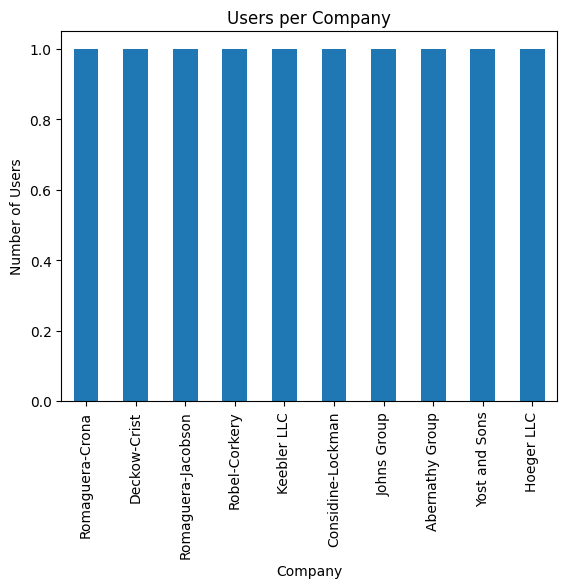

In [28]:
company_count.plot(kind='bar')
plt.title("Users per Company")
plt.xlabel("Company")
plt.ylabel("Number of Users")
plt.show()
